<hr style="border-top:10px solid Gold; margin-top: 2px; margin-bottom: 0px">
<hr style="border-top:10px solid Blue; margin-top: 0px; margin-bottom: 2px">

# Rediscovering Pokemon GO and the Main Series Games


<hr style="border-top:10px solid Gold; margin-top: 2px; margin-bottom: 0px">
<hr style="border-top:10px solid Blue; margin-top: 0px; margin-bottom: 2px">

In [1]:
# To get rid of those blocks of red warnings
import warnings
warnings.filterwarnings("ignore")
# Standard imports
import pandas as pd
# Vis imports
import matplotlib.pyplot as plt
import seaborn as sns
# Stats imports
from scipy.stats import spearmanr
# Custom imports
import wrangle
import explore

## Project Goal

- To perform exploratory analysis on the Pokemon main series games and mobile game Pokemon GO

<hr style="border-top:10px solid Gold; margin-top: 2px; margin-bottom: 0px">
<hr style="border-top:10px solid Blue; margin-top: 0px; margin-bottom: 2px">

## Acquire and Prepare Data

<hr style="border-top:10px solid Gold; margin-top: 2px; margin-bottom: 0px">
<hr style="border-top:10px solid Blue; margin-top: 0px; margin-bottom: 2px">

The final dataframe df_best_attack_set is a new dataframe made from joining data from Pokemon GO and a Pokemon dataset on kaggle for the main series pokemon games.
In this dataset you will see that ER or Equivalent Rating was changed to Battle_Stat. This makes it a bit easier to follow for those not as familiar with the way stats work in the Pokemon games. If you would like further explanation please refer to the README on GitHub. 

In [2]:
# This function reads in 3 dataframes from csv's and prepares them for exploration.
df, df1, df_best_attack_set = wrangle.wrangle_df()

In [3]:
df.head()

,Pokemon,Fast Move,Charged Move,DPS,TDO,Battle_Stat,CP
0,Mega Mewtwo Y,Confusion,Psystrike,26.355,999.7,65.41,5610
1,Mega Mewtwo Y,Psycho Cut,Psystrike,26.207,994.1,65.04,5610
2,Mega Mewtwo X,Confusion,Psystrike,25.513,967.8,63.32,5429
3,Shadow Mewtwo,Confusion,Psystrike,25.400,662.7,57.41,4178
4,Mega Mewtwo X,Psycho Cut,Psystrike,25.380,962.8,62.99,5429


In [4]:
df1.head()

,#,Pokemon,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,Mega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [5]:
df_best_attack_set.head()

,Pokemon,DPS,TDO,Battle_Stat,Max_CP_Lv40,Fast_Move,Charged_Move,#,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,Bulbasaur,8.963,112.1,80.7,1115,Vine Whip,Power Whip,1.0,Grass,Poison,318.0,45.0,49.0,49.0,65.0,65.0,45.0,1.0,False
1,Shadow Bulbasaur,10.802,112.6,141.8,1115,Vine Whip,Power Whip,1.0,Grass,Poison,318.0,45.0,49.0,49.0,65.0,65.0,45.0,1.0,False
2,Ivysaur,10.982,204.7,271.1,1699,Vine Whip,Power Whip,2.0,Grass,Poison,405.0,60.0,62.0,63.0,80.0,80.0,60.0,1.0,False
3,Mega Venusaur,17.294,706.4,3653.6,3698,Vine Whip,Frenzy Plant,3.0,Grass,Poison,625.0,80.0,100.0,123.0,122.0,120.0,80.0,1.0,False
4,Venusaur,14.782,429.0,1385.6,2720,Vine Whip,Frenzy Plant,3.0,Grass,Poison,525.0,80.0,82.0,83.0,100.0,100.0,80.0,1.0,False


## Acquire and Prepare Takeaways

- We ended up with 3 different dataframes to look at.
- The data was not split as we are not doing any modeling for this project.
- ER was changed to Battle_Stat to make it a bit more intutive to understand.
- The dataframe best_attack_set takes the optimal moveset for the max Battle_Stat for each pokemon and joins with the data from the main series Pokemon games to get a more complete picture of the data.

<hr style="border-top:10px solid Gold; margin-top: 2px; margin-bottom: 0px">
<hr style="border-top:10px solid Blue; margin-top: 0px; margin-bottom: 2px">

## Exploration

<hr style="border-top:10px solid Gold; margin-top: 2px; margin-bottom: 0px">
<hr style="border-top:10px solid Blue; margin-top: 0px; margin-bottom: 2px">

## What is the percentage breakdown of primary and secondary types?

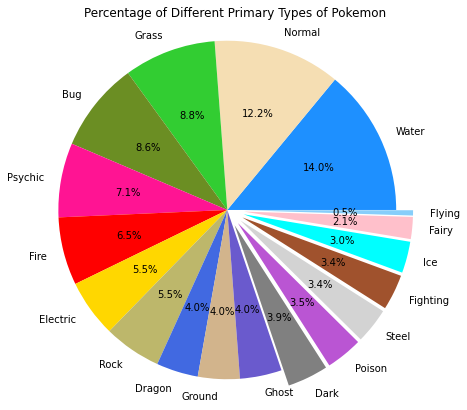

In [6]:
explore.primary_type_pie_chart()

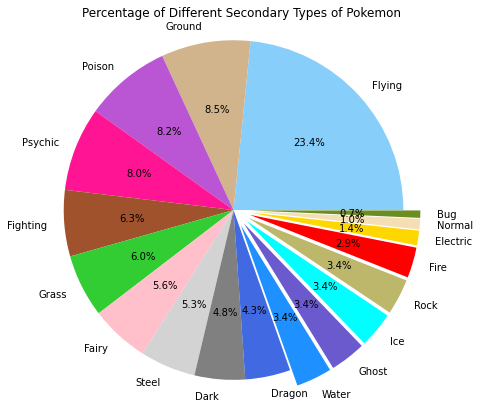

In [7]:
explore.secondary_type_pie_chart()

## Pie Chart Takeaways
- Water is the most common primary type.
- Flying is the least common primary type.
- Flying is the most common secondary type.
- Bug is the least common secondary type.

## Lets look at the correlations in the data.

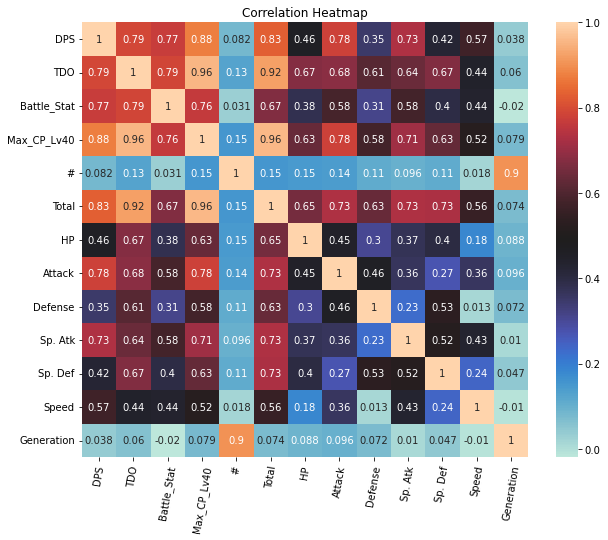

In [8]:
explore.corr_heatmap(df_best_attack_set)

## Correlation Heatmap Takeaways
- Max_CP_Lv40 has a very strong correlation with TDO, Battle_Stat, Total, Attack, and Sp Atk.
- Generation doesn't have a good correlation with any data associated with stats.

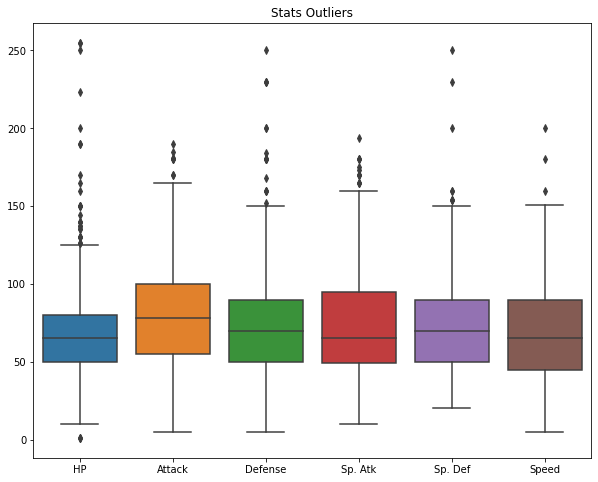

In [28]:
df_box = explore.box_plot(df_best_attack_set)

## Lets look at some of the extreme outliers

In [29]:
df_box[df_box.HP <= 5]

,Pokemon,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
379,Shedinja,Bug,Ghost,1.0,90.0,45.0,30.0,30.0,40.0
380,Shedinja,Bug,Ghost,1.0,90.0,45.0,30.0,30.0,40.0
381,Shedinja,Bug,Ghost,1.0,90.0,45.0,30.0,30.0,40.0


In [30]:
df_box[df_box.HP >= 200]

,Pokemon,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
157,Chansey,Normal,NaN,250.0,5.0,5.0,35.0,105.0,50.0
321,Blissey,Normal,NaN,255.0,10.0,10.0,75.0,135.0,55.0
1016,Guzzlord,Dark,Dragon,223.0,101.0,53.0,97.0,53.0,43.0
1098,Eternamax Eternatus,Poison,Dragon,255.0,115.0,250.0,125.0,250.0,130.0
1105,Regidrago,Dragon,NaN,200.0,100.0,50.0,100.0,50.0,80.0


In [31]:
df_box[df_box.Speed >= 160]

,Pokemon,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
378,Ninjask,Bug,Flying,61.0,90.0,45.0,50.0,50.0,160.0
514,Deoxys (Speed Forme),Psychic,NaN,50.0,95.0,90.0,95.0,90.0,180.0
1104,Regieleki,Electric,NaN,80.0,100.0,50.0,100.0,50.0,200.0


## Box Plot Takeaways
- Looking at the outliers it appears these are not errors in the data.
- Shedinja is a special pokemon that has only 1 HP(Hit Point) but can onlt be affected by supereffective moves.

## Lets make a function that will take in a pokemon name and return its stats with the optimal moveset for the highest battle stat.

In [9]:
explore.find_best_moveset(df_best_attack_set)

Type a Pokemons name to find its best moveset. Mudkip


    Pokemon    DPS   TDO  Battle_Stat  Max_CP_Lv40  Fast_Move Charged_Move  \
340  Mudkip  8.261  94.1         53.1         1128  Water Gun       Return   

         # Type 1 Type 2  Total    HP  Attack  Defense  Sp. Atk  Sp. Def  \
340  258.0  Water    NaN  310.0  50.0    70.0     50.0     50.0     50.0   

     Speed  Generation Legendary  
340   40.0         3.0     False  


Would you like to check another Pokemon? Y/N y


Please enter Y or N


Would you like to check another Pokemon? Y/N Y
Type a Pokemons name to find its best moveset. Gengar


    Pokemon     DPS    TDO  Battle_Stat  Max_CP_Lv40 Fast_Move Charged_Move  \
132  Gengar  18.109  350.4       2080.9         2878      Lick  Shadow Ball   

        # Type 1  Type 2  Total    HP  Attack  Defense  Sp. Atk  Sp. Def  \
132  94.0  Ghost  Poison  500.0  60.0    65.0     60.0    130.0     75.0   

     Speed  Generation Legendary  
132  110.0         1.0     False  


Would you like to check another Pokemon? Y/N N


Thank you have a great day!


## Its not perfect but it works!!

## This could be used as the fondation to develop an app that can assist new and professional level players for Pokemon Go.

## What pokemon has the highest and lowest cp?

In [10]:
df_best_attack_set[df_best_attack_set.Max_CP_Lv40 == df_best_attack_set.Max_CP_Lv40.max()]

,Pokemon,DPS,TDO,Battle_Stat,Max_CP_Lv40,Fast_Move,Charged_Move,#,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
1098,Eternamax Eternatus,14.836,2500.2,8164.7,8187,Dragon Tail,Hyper Beam,890.0,Poison,Dragon,1125.0,255.0,115.0,250.0,125.0,250.0,130.0,8.0,True


In [11]:
df_best_attack_set[df_best_attack_set.Max_CP_Lv40 == df_best_attack_set.Max_CP_Lv40.min()]

,Pokemon,DPS,TDO,Battle_Stat,Max_CP_Lv40,Fast_Move,Charged_Move,#,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
177,Magikarp,1.630,11.3,0.0,274,Splash,Return,129.0,Water,NaN,200.0,20.0,10.0,55.0,15.0,20.0,80.0,1.0,False
178,Magikarp,1.630,11.3,0.0,274,Splash,Struggle,129.0,Water,NaN,200.0,20.0,10.0,55.0,15.0,20.0,80.0,1.0,False
456,Feebas,2.333,16.2,0.2,274,Tackle,Mirror Coat,349.0,Water,NaN,200.0,20.0,15.0,20.0,10.0,55.0,80.0,3.0,False
1195,Shadow Magikarp,1.336,7.7,0.0,274,Splash,Struggle,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1196,Shadow Magikarp,1.336,7.7,0.0,274,Splash,Frustration,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Takeaways
- Eternamax Eternatus has the highest CP, however it is not yet implemented in the game.
- There is a three way tie for the lowest CP between Feebas, Magikarp, and Shadow Magikarp.

## What "S tier pokemon" in Pokemon Go has the highest and lowest Battle Stat?


In [12]:
S_tier_attackers = ['Kartana', 'Terrakion', 'Shadow Metagross', 'Shadow Machamp',
                    'Shadow Mewtwo', 'Shadow Salamence', 'Shadow Dragonite', 'Mega Latios',
                    'Mega Gengar', 'Mega Charizard Y', 'Shadow Mamoswine']

In [13]:
df_S_tier_attackers = df_best_attack_set[(df_best_attack_set.Pokemon == 'Kartana') | (df_best_attack_set.Pokemon == 'Terrakion') |
                  (df_best_attack_set.Pokemon == 'Shadow Metagross') | (df_best_attack_set.Pokemon == 'Shadow Machamp') |
                  (df_best_attack_set.Pokemon == 'Shadow Mewtwo') | (df_best_attack_set.Pokemon == 'Shadow Salamence') |
                  (df_best_attack_set.Pokemon == 'Shadow Dragonite') | (df_best_attack_set.Pokemon == 'Mega Latios') |
                  (df_best_attack_set.Pokemon == 'Shadow Gengar') | (df_best_attack_set.Pokemon == 'Mega Charizard Y') |
                  (df_best_attack_set.Pokemon == 'Shadow Mamoswine')]

In [14]:
df_S_tier_attackers

,Pokemon,DPS,TDO,Battle_Stat,Max_CP_Lv40,Fast_Move,Charged_Move,#,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
11,Mega Charizard Y,21.764,758.0,7814.8,4455,Fire Spin,Blast Burn,6.0,Fire,Flying,634.0,78.0,104.0,78.0,159.0,115.0,100.0,1.0,False
503,Mega Latios,20.704,829.4,7360.9,5007,Dragon Breath,Psychic,381.0,Dragon,Psychic,700.0,80.0,130.0,100.0,160.0,120.0,110.0,3.0,True
801,Terrakion,19.461,626.2,4615.8,3698,Double Kick,Sacred Sword,639.0,Rock,Fighting,580.0,91.0,129.0,90.0,72.0,90.0,108.0,5.0,True
1015,Kartana,20.374,428.9,3627.7,3677,Razor Leaf,Leaf Blade,798.0,Grass,Steel,570.0,59.0,181.0,131.0,59.0,31.0,109.0,7.0,False
1120,Shadow Dragonite,20.854,575.4,5218.5,3792,Dragon Tail,Outrage,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1192,Shadow Machamp,19.650,439.0,3330.3,3056,Counter,Dynamic Punch,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1203,Shadow Mamoswine,20.377,487.6,4125.6,3328,Mud Slap,Avalanche,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1211,Shadow Metagross,21.763,627.0,6462.6,3791,Bullet Punch,Meteor Mash,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1213,Shadow Mewtwo,25.400,662.7,10859.6,4178,Confusion,Psystrike,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1258,Shadow Salamence,22.163,541.8,5898.5,3749,Dragon Tail,Outrage,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
df_S_tier_attackers[df_S_tier_attackers.Battle_Stat == df_S_tier_attackers.Battle_Stat.max()]

,Pokemon,DPS,TDO,Battle_Stat,Max_CP_Lv40,Fast_Move,Charged_Move,#,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
1213,Shadow Mewtwo,25.4,662.7,10859.6,4178,Confusion,Psystrike,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
df_S_tier_attackers[df_S_tier_attackers.Battle_Stat == df_S_tier_attackers.Battle_Stat.min()]

,Pokemon,DPS,TDO,Battle_Stat,Max_CP_Lv40,Fast_Move,Charged_Move,#,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
1192,Shadow Machamp,19.65,439.0,3330.3,3056,Counter,Dynamic Punch,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## S Tier Pokemon Takeaways
- Shadow Mewtwo has the highest Battle_Stat for S Tier Pokemon.
- Shadow Machamp has the lowest Battle_Stat for S Tier Pokemon.

## What pokemon has the highest and lowest average battle stat between all of their move sets?

In [17]:
df.groupby('Pokemon').mean('Battle_Stat').nlargest(1, columns = 'Battle_Stat')


,DPS,TDO,Battle_Stat,CP
Pokemon,,,,
Mega Mewtwo Y,21.9695,833.38125,54.524375,5610.0


In [18]:
df.groupby('Pokemon').mean('Battle_Stat').nsmallest(1, columns = 'Battle_Stat')

,DPS,TDO,Battle_Stat,CP
Pokemon,,,,
Shadow Magikarp,0.9635,5.55,1.495,274.0


## Highest and Lowest Average Battle Stat Takeaways
- Mega Mewtwo has the best average Battle Stat between all movesets.
- Shadow Magikarp has the worst average Battle Stat between all movesets.

## What primary type has the highest average total stats?

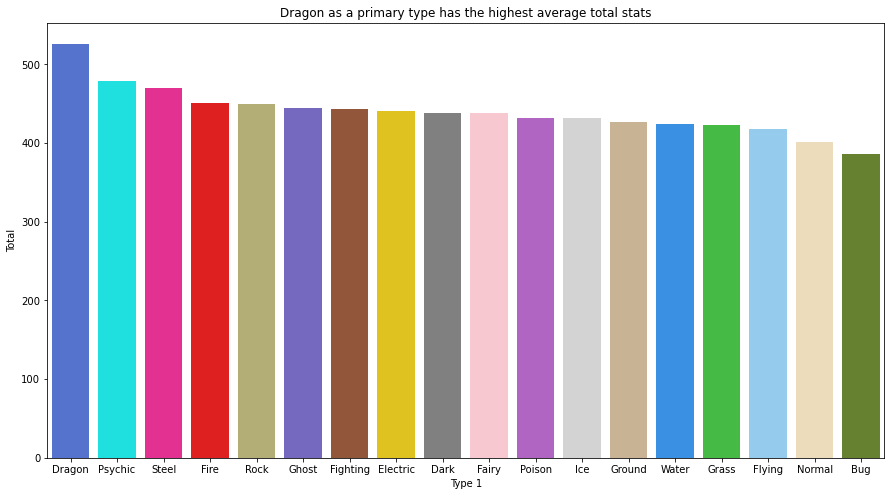

In [19]:
explore.pri_type_avg_stats(df_best_attack_set)

## Bar Chart Takeaways
- Dragon has the highest average total stats for primary type.
- Bug has the lowest average total stats for primary type.


## Lets compare the highest and lowest average total stats. (Dragon vs Bug)

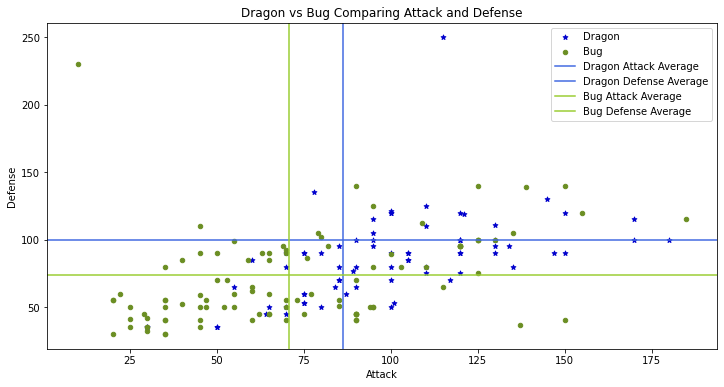

In [20]:
explore.dragon_vs_bug_atk_def_vis(df_best_attack_set)

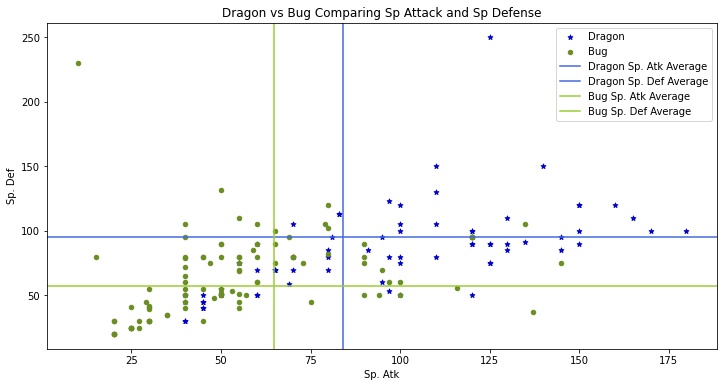

In [21]:
explore.dragon_vs_bug_spatk_spdef_vis(df_best_attack_set)

## Scatter Plot Takeaways
- There is a larger difference in Sp. Atk and Sp. Def compared to Attack and Defense.
- Dragon type seems to have more Sp. Atk outliers then Bug does.

## Let's look at total stats by generation

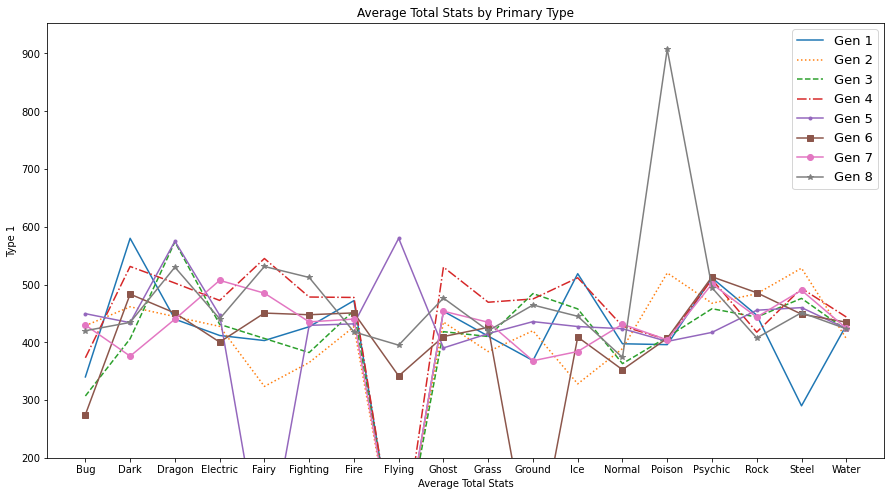

In [22]:
explore.stats_by_gen_vis(df_best_attack_set)

## Line Plot Takeaways
- Generation 6 and 3 have a low Bug total stat average compared to the other generations.
- Generation 1 has a very low Steel total stat average.
- Generation 8 has a massive jump in the Poison total stat average. (This is due to Eternamax Eternatus)

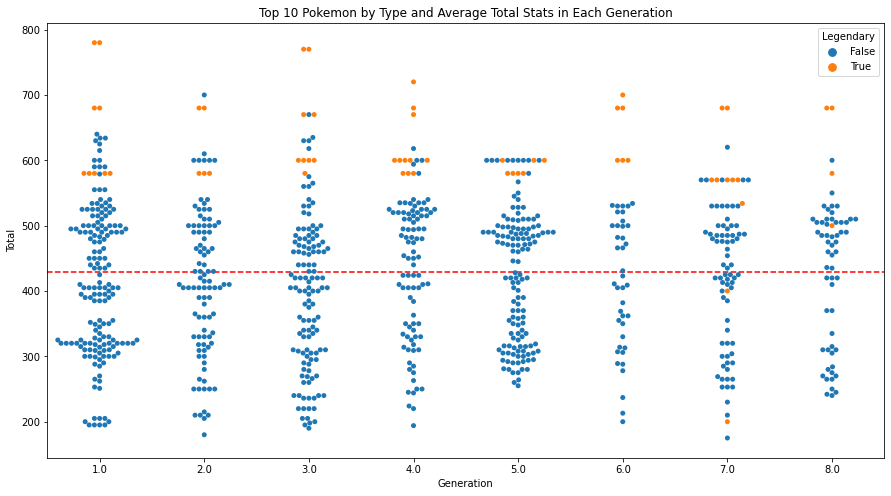

In [23]:
explore.top_10_types_by_generation(df_best_attack_set)

## Swarm Plot Takeaways
- Generation 5 seems to have a hard limit to the total stats a pokemon can have.
- Generation 6 made sure non-legendaries and legendaries had a clear difference in stats.